In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
hiv_df = pd.read_csv("HIV data 2000-2023.csv",  encoding='ISO-8859-1')

In [3]:
hiv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   IndicatorCode        1552 non-null   object
 1   Indicator            1552 non-null   object
 2   ValueType            1552 non-null   object
 3   ParentLocationCode   1552 non-null   object
 4   ParentLocation       1552 non-null   object
 5   Location type        1552 non-null   object
 6   SpatialDimValueCode  1552 non-null   object
 7   Location             1552 non-null   object
 8   Period type          1552 non-null   object
 9   Period               1552 non-null   int64 
 10  Value                1552 non-null   object
dtypes: int64(1), object(10)
memory usage: 133.5+ KB


In [4]:
hiv_df.shape

(1552, 11)

In [5]:
hiv_df.isnull().sum()

IndicatorCode          0
Indicator              0
ValueType              0
ParentLocationCode     0
ParentLocation         0
Location type          0
SpatialDimValueCode    0
Location               0
Period type            0
Period                 0
Value                  0
dtype: int64

In [6]:
hiv_df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,Value
0,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2023,320 000 [280 000 - 380 000]
1,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2022,320 000 [280 000 - 380 000]
2,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2021,320 000 [280 000 - 380 000]
3,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2020,320 000 [280 000 - 370 000]
4,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2015,300 000 [260 000 - 350 000]


In [7]:
hiv_df['HIV_Estimate'] = hiv_df['Value'].str.extract(r'(\d+[\s\d]*)')[0].str.replace(" ","").astype(float)

In [8]:
hiv_df = hiv_df.dropna(subset = 'HIV_Estimate')

In [9]:
hiv_sum = hiv_df.groupby('Location')['HIV_Estimate'].sum().sort_values(ascending=False)
hiv_sum_cumsum = hiv_sum.cumsum() / hiv_sum.sum()
top_countries = hiv_sum_cumsum[hiv_sum_cumsum <= 0.75].index#sort_values(ascending = False)
top_countries

Index(['South Africa', 'Mozambique', 'Nigeria', 'Kenya',
       'United Republic of Tanzania', 'Zimbabwe', 'Uganda', 'Zambia', 'Malawi',
       'Brazil', 'Thailand', 'Ethiopia', 'Democratic Republic of the Congo',
       'Cote d'Ivoire'],
      dtype='object', name='Location')

In [10]:
top_df = hiv_df[hiv_df['Location'].isin(top_countries)]
top_df

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,Value,HIV_Estimate
48,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,CIV,Cote d'Ivoire,Year,2023,420 000 [370 000 - 480 000],420000.0
49,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,CIV,Cote d'Ivoire,Year,2022,430 000 [380 000 - 490 000],430000.0
50,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,CIV,Cote d'Ivoire,Year,2021,430 000 [390 000 - 490 000],430000.0
51,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,CIV,Cote d'Ivoire,Year,2020,440 000 [390 000 - 490 000],440000.0
52,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,CIV,Cote d'Ivoire,Year,2015,460 000 [420 000 - 510 000],460000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1323,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,SEAR,South-East Asia,Country,THA,Thailand,Year,2020,590 000 [530 000 - 680 000],590000.0
1324,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,SEAR,South-East Asia,Country,THA,Thailand,Year,2015,640 000 [580 000 - 730 000],640000.0
1325,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,SEAR,South-East Asia,Country,THA,Thailand,Year,2010,720 000 [630 000 - 790 000],720000.0
1326,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,SEAR,South-East Asia,Country,THA,Thailand,Year,2005,810 000 [720 000 - 910 000],810000.0


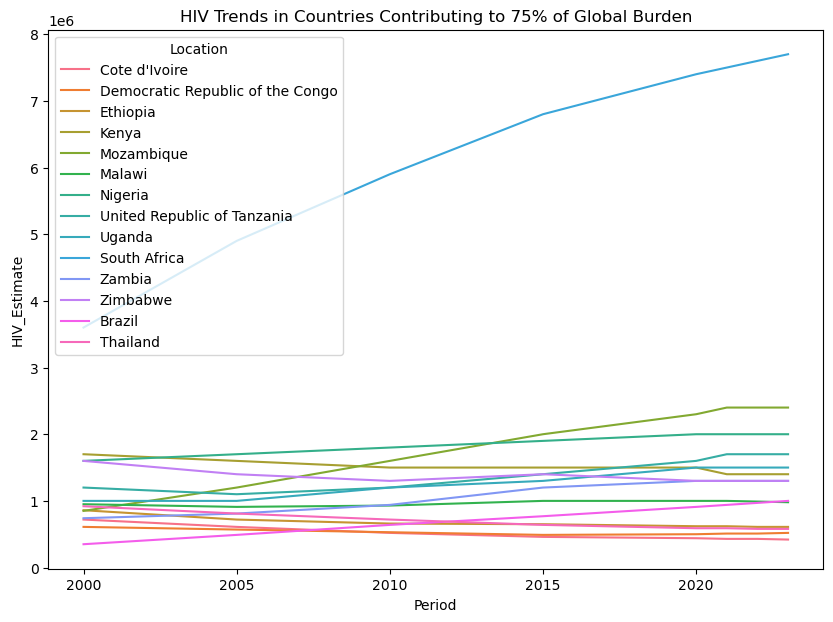

In [12]:
plt.figure(figsize = (10,7))
sns.lineplot(data = top_df, x='Period', y = 'HIV_Estimate', hue = "Location")
plt.title('HIV Trends in Countries Contributing to 75% of Global Burden')
plt.show()

# Plot 2
Trend of HIV cases in the countries contributing to 75% of the burden within each WHO region


In [13]:
hiv_df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,Value,HIV_Estimate
0,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2023,320 000 [280 000 - 380 000],320000.0
1,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2022,320 000 [280 000 - 380 000],320000.0
2,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2021,320 000 [280 000 - 380 000],320000.0
3,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2020,320 000 [280 000 - 370 000],320000.0
4,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2015,300 000 [260 000 - 350 000],300000.0


In [14]:
regions = hiv_df['ParentLocation'].unique()

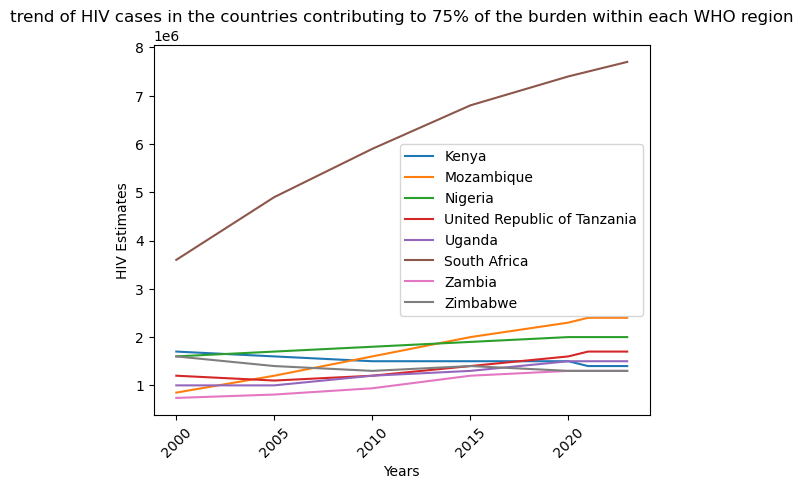

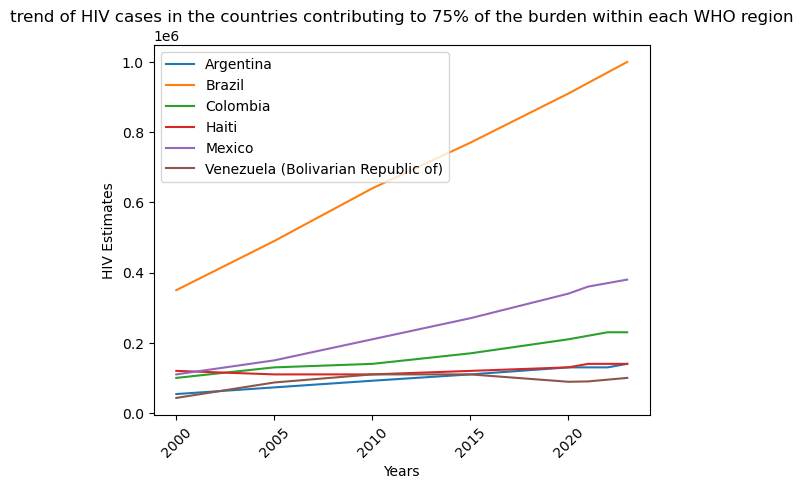

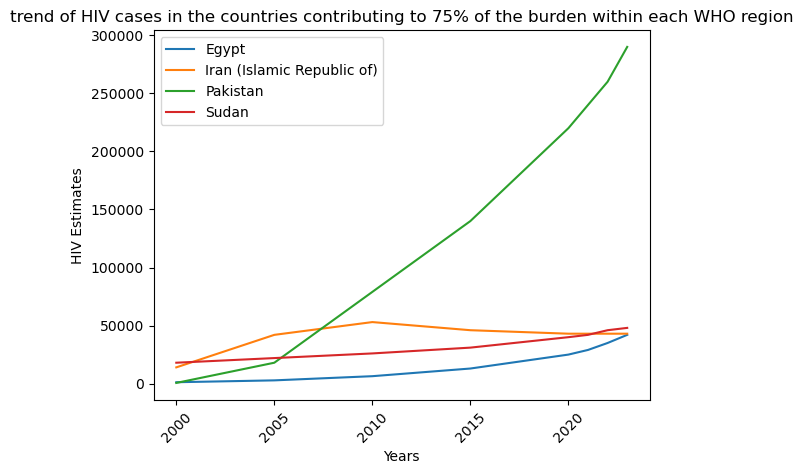

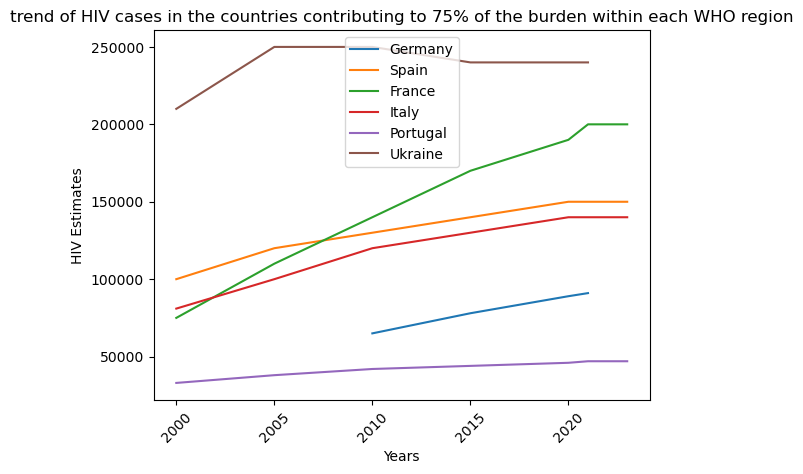

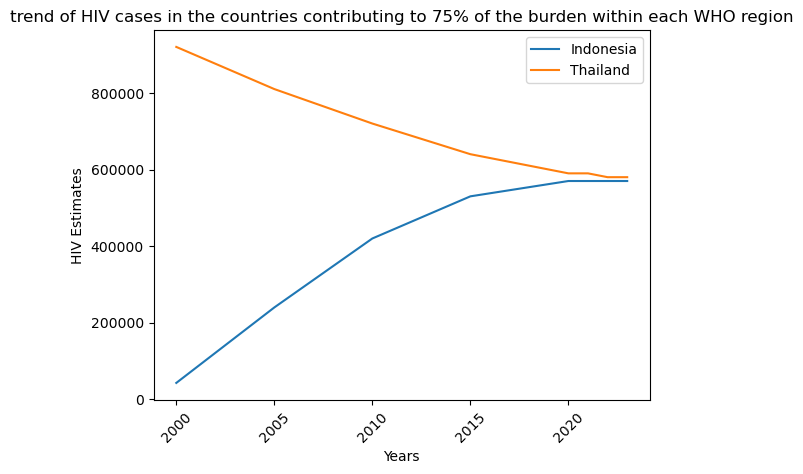

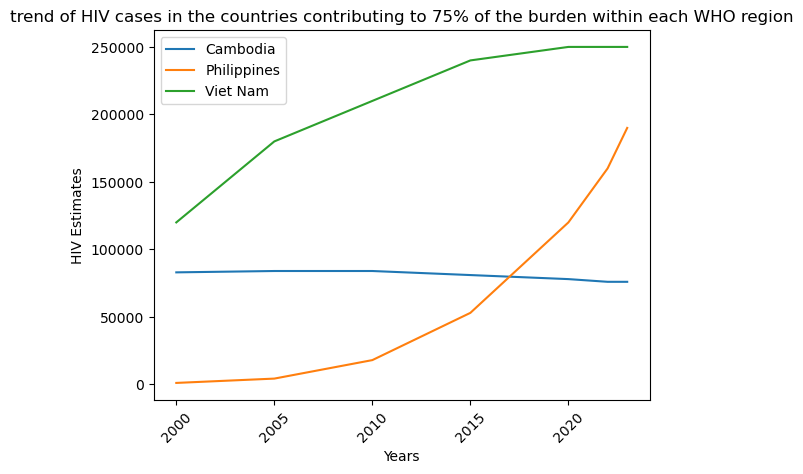

In [15]:
for region in regions:
    regional_df = hiv_df[hiv_df['ParentLocation'] == region]
    countries = regional_df.groupby('Location')['HIV_Estimate'].sum().sort_values(ascending = False)
    cummilative = countries.cumsum()/ countries.sum()
    top_75_countries = cummilative[cummilative <= 0.75].index
    #.sds
    top_regional = regional_df[regional_df['Location'].isin(top_75_countries)]
    #hg
    sns.lineplot(data = top_regional, x= 'Period', y = 'HIV_Estimate', hue = 'Location')
    plt.ylabel("HIV Estimates")
    plt.xlabel('Years')
    plt.title('trend of HIV cases in the countries contributing to 75% of the burden within each WHO region')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()




In [16]:
top_75_countries

Index(['Viet Nam', 'Philippines', 'Cambodia'], dtype='object', name='Location')

# Poverty data 
World Bank data on the multidimensional poverty headcount ratio, which includes factors such as income, educational attainment, school enrolment, electricity access, sanitation and drinking water.

In [17]:
poverty_df = pd.read_excel("copy.xlsx")

In [18]:
poverty_df.head()

,Region,Country code,Economy,Reporting year,Survey name,Survey year,Survey coverage,Welfare type,Survey comparability,Monetary (%),Educational attainment (%),Educational enrollment (%),Electricity (%),Sanitation (%),Drinking water (%),Multidimensional poverty headcount ratio (%)
0,SSA,AGO,Angola,2018,IDREA,2018,N,c,2,31.122005,29.753423,27.44306,52.639532,53.637516,32.106507,47.203606
1,ECA,ALB,Albania,2012,HBS,2018,N,c,1,0.048107,0.19238,-,0.06025,6.579772,9.594966,0.293161
2,LAC,ARG,Argentina,2010,EPHC-S2,2021,U,i,3,0.894218,1.08532,0.731351,0,0.257453,0.364048,0.906573
3,ECA,ARM,Armenia,2010,ILCS,2021,N,c,1,0.523521,0,1.793004,0,0.397725,0.660082,0.523521
4,EAP,AUS,Australia,2010,SIH-LIS,2018,N,I,3,0.516880,1.71188,-,0,0,-,2.215770


In [19]:
poverty_df.isnull().sum()

Region                                          0
Country code                                    0
Economy                                         0
Reporting year                                  0
Survey name                                     0
Survey year                                     0
Survey coverage                                 0
Welfare type                                    0
Survey comparability                            0
Monetary (%)                                    0
Educational attainment (%)                      0
Educational enrollment (%)                      0
Electricity (%)                                 0
Sanitation (%)                                  0
Drinking water (%)                              0
Multidimensional poverty headcount ratio (%)    0
dtype: int64

In [20]:
# Standardize column names
hiv_df.rename(columns={'Location': 'Country', 'Period': 'Year'}, inplace=True)
poverty_df.rename(columns ={'Economy': 'Country', 'Reporting year': 'Year'}, inplace=True)  # adjust if different


In [21]:
poverty_df.head()

,Region,Country code,Country,Year,Survey name,Survey year,Survey coverage,Welfare type,Survey comparability,Monetary (%),Educational attainment (%),Educational enrollment (%),Electricity (%),Sanitation (%),Drinking water (%),Multidimensional poverty headcount ratio (%)
0,SSA,AGO,Angola,2018,IDREA,2018,N,c,2,31.122005,29.753423,27.44306,52.639532,53.637516,32.106507,47.203606
1,ECA,ALB,Albania,2012,HBS,2018,N,c,1,0.048107,0.19238,-,0.06025,6.579772,9.594966,0.293161
2,LAC,ARG,Argentina,2010,EPHC-S2,2021,U,i,3,0.894218,1.08532,0.731351,0,0.257453,0.364048,0.906573
3,ECA,ARM,Armenia,2010,ILCS,2021,N,c,1,0.523521,0,1.793004,0,0.397725,0.660082,0.523521
4,EAP,AUS,Australia,2010,SIH-LIS,2018,N,I,3,0.516880,1.71188,-,0,0,-,2.215770


In [22]:
merged_df = pd.merge(hiv_df, poverty_df, on=['Country', 'Year'], how='inner')
merged_df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Country,Period type,Year,...,Survey coverage,Welfare type,Survey comparability,Monetary (%),Educational attainment (%),Educational enrollment (%),Electricity (%),Sanitation (%),Drinking water (%),Multidimensional poverty headcount ratio (%)
0,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,BEN,Benin,Year,2015,...,N,c,1,12.723279,49.023893,31.661823,34.818304,76.649594,24.10913,45.443240
1,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,CIV,Cote d'Ivoire,Year,2015,...,N,c,2,9.733193,44.493997,24.717054,9.26495,59.909374,17.286547,29.177094
2,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,GNB,Guinea-Bissau,Year,2010,...,N,c,3,25.962856,20.071073,31.059781,27.57051,60.362864,20.897064,38.730049
3,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,KEN,Kenya,Year,2015,...,N,c,3,36.146057,10.055726,1.179968,24.500306,22.312516,36.060327,38.490102
4,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,MWI,Malawi,Year,2010,...,N,c,1,70.060599,54.329389,3.686354,88.757396,75.137657,11.400399,78.252000


In [23]:
merged_df.columns  # run this to know the actual column names

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Country',
       'Period type', 'Year', 'Value', 'HIV_Estimate', 'Region',
       'Country code', 'Survey name', 'Survey year', 'Survey coverage',
       'Welfare type', 'Survey comparability', 'Monetary (%)',
       'Educational attainment (%)', 'Educational enrollment (%)',
       'Electricity (%)', 'Sanitation (%)', 'Drinking water (%)',
       'Multidimensional poverty headcount ratio (%)'],
      dtype='object')

In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   IndicatorCode                                 38 non-null     object 
 1   Indicator                                     38 non-null     object 
 2   ValueType                                     38 non-null     object 
 3   ParentLocationCode                            38 non-null     object 
 4   ParentLocation                                38 non-null     object 
 5   Location type                                 38 non-null     object 
 6   SpatialDimValueCode                           38 non-null     object 
 7   Country                                       38 non-null     object 
 8   Period type                                   38 non-null     object 
 9   Year                                          38 non-null     int64

# Checkpoint
Saving as my merged dataset as a csv

In [25]:
merged_df.to_csv('merged_hiv_data.csv', index=False)

In [26]:
import os
print(os.getcwd())


C:\Users\User\Documents\CEMA Projects


# Summary

The analysis explored the relationship between HIV prevalence and multidimensional poverty across African countries from 2000 to 2023. By identifying the countries that contribute to 75% of the global and regional HIV burden, we were able to highlight priority areas for targeted health interventions. A merged dataset from WHO and the World Bank revealed a positive correlation between the number of people living with HIV and higher multidimensional poverty headcount ratios in most countries. Countries with limited access to basic services—such as education, clean water, sanitation, and electricity—tended to have higher HIV rates, suggesting that structural inequalities may perpetuate both poverty and disease. 
Benin and Guinea-Bissau did not agree with our earlier analysis. Despite 
having higher poverty index ratios of 45% and 39%, the sum of their HIV estimates was quite low compared to their counterparts (71,000 and 31,000)

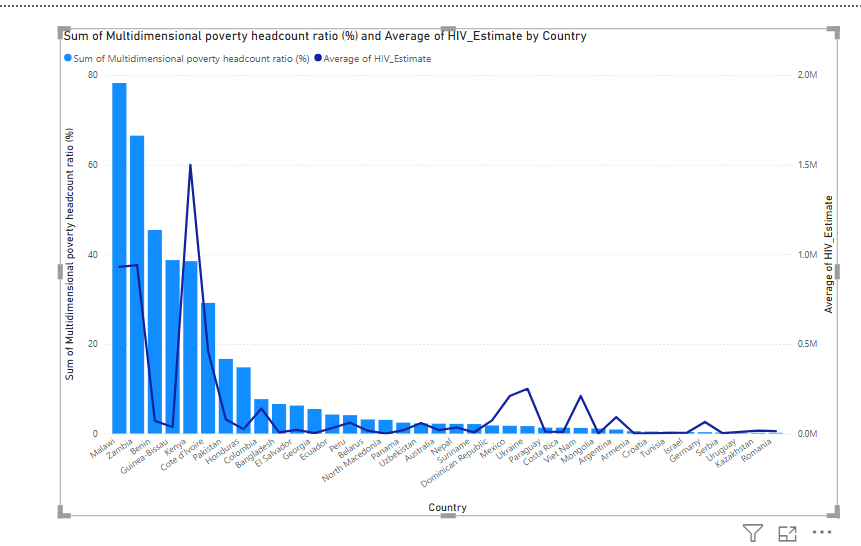

 These findings emphasize the need for integrated policies that simultaneously address health and socioeconomic conditions, particularly in sub-Saharan Africa, to curb the spread of HIV and improve the quality of life for affected populations.

# Question 2

You have been provided with data on the under-five mortality rate and neonatal mortality rate for the African region, which has been downloaded from the UN Inter-agency Group for Child Mortality Estimation. Your task is to:

Filter data for the eight countries belonging to the East African Community (list here: https://www.eac.int/overview-of-ea.c)
Visualize the latest estimate of each indicator at the country level using shapefiles, which can be downloaded from www.gadm.org.
Show the average trends in the mortality rates over time (plot the average trend line and add the points in the graphic for the country level estimates for each indicator. Expectation: two plo
ts).
Based on your visualizations, identify the countries with the highest under-five mortality rates in East Africa and the highest neonatal mortality.


In [27]:
Eatern_Africa_Countries = ['South Sudan', 'Kenya', 'Tanzania', 'Uganda', 'Somalia', 'Democratic Republic of the Congo', 'Rwanda', 'Burundi']

In [29]:
under_5 = pd.read_csv('under_five mortality rate.csv')
neonatal = pd.read_csv('neonatal_mortality_rate.csv')
dataset_raw = pd.read_csv('dataset_datascience.csv', encoding ='ISO-8859-1')

print (under_5.shape)
print(neonatal.shape)
print (dataset_raw.shape)

(44, 44)
(34, 44)
(129564, 23)


C:\Users\User\AppData\Local\Temp\ipykernel_9576\2507977371.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_raw = pd.read_csv('dataset_datascience.csv', encoding ='ISO-8859-1')


# Under 5 clean up

In [30]:
under_5.head()

,REF_AREA,Geographic area,INDICATOR,Indicator,SEX,Sex,WEALTH_QUINTILE,Wealth Quintile,SERIES_NAME,Series Name,...,DEFINITION,INTERVAL,SERIES_METHOD,Series Method,LOWER_BOUND,UPPER_BOUND,STATUS,YEAR_TO_ACHIEVE,MODEL,Model Used
0,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,198.675695,209.928512,NaN,NaN,NaN,NaN
1,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,195.249935,205.879194,NaN,NaN,NaN,NaN
2,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,192.162302,202.345691,NaN,NaN,NaN,NaN
3,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,199.321189,209.822892,NaN,NaN,NaN,NaN
4,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,196.677399,206.697079,NaN,NaN,NaN,NaN


In [31]:
under_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   REF_AREA                44 non-null     object 
 1   Geographic area         44 non-null     object 
 2   INDICATOR               44 non-null     object 
 3   Indicator               44 non-null     object 
 4   SEX                     44 non-null     object 
 5   Sex                     44 non-null     object 
 6   WEALTH_QUINTILE         44 non-null     object 
 7   Wealth Quintile         44 non-null     object 
 8   SERIES_NAME             44 non-null     object 
 9   Series Name             44 non-null     object 
 10  SERIES_YEAR             44 non-null     int64  
 11  Series Year             44 non-null     int64  
 12  REGIONAL_GROUP          0 non-null      float64
 13  Regional group          0 non-null      float64
 14  TIME_PERIOD             44 non-null     obje

In [32]:
under_5.isnull().sum()

REF_AREA                   0
Geographic area            0
INDICATOR                  0
Indicator                  0
SEX                        0
Sex                        0
WEALTH_QUINTILE            0
Wealth Quintile            0
SERIES_NAME                0
Series Name                0
SERIES_YEAR                0
Series Year                0
REGIONAL_GROUP            44
Regional group            44
TIME_PERIOD                0
OBS_VALUE                  0
COUNTRY_NOTES             44
CONNECTION                44
DEATH_CATEGORY            44
CATEGORY                  44
OBS_STATUS                 0
Observation Status         0
UNIT_MEASURE               0
Unit of measure            0
SERIES_CATEGORY           44
Series Category           44
SERIES_TYPE               44
Series Type               44
STD_ERR                   44
REF_DATE                   0
AGE_GROUP_OF_WOMEN        44
Age Group of Women        44
TIME_SINCE_FIRST_BIRTH    44
Time Since First Birth    44
DEFINITION    

In [33]:
under_5 = under_5.dropna(axis =1 , how = 'all')
under_5_clean = under_5.drop(['SEX', 'WEALTH_QUINTILE', 'SERIES_NAME', 'SERIES_YEAR', 'REF_AREA', 'OBS_STATUS', 'UNIT_MEASURE'], axis = 1)

In [34]:
under_5.isnull().sum()

REF_AREA              0
Geographic area       0
INDICATOR             0
Indicator             0
SEX                   0
Sex                   0
WEALTH_QUINTILE       0
Wealth Quintile       0
SERIES_NAME           0
Series Name           0
SERIES_YEAR           0
Series Year           0
TIME_PERIOD           0
OBS_VALUE             0
OBS_STATUS            0
Observation Status    0
UNIT_MEASURE          0
Unit of measure       0
REF_DATE              0
INTERVAL              0
LOWER_BOUND           0
UPPER_BOUND           0
dtype: int64

In [36]:
under_5_clean.head()

,Geographic area,INDICATOR,Indicator,Sex,Wealth Quintile,Series Name,Series Year,TIME_PERIOD,OBS_VALUE,Observation Status,Unit of measure,REF_DATE,INTERVAL,LOWER_BOUND,UPPER_BOUND
0,Sub-Saharan Africa,MRY0T4,Under-five mortality rate,Total,Total,UN IGME estimate,2023,1980-06,203.808836,Normal value,"Deaths per 1,000 live births",1980.5,1,198.675695,209.928512
1,Sub-Saharan Africa,MRY0T4,Under-five mortality rate,Total,Total,UN IGME estimate,2023,1981-06,200.183725,Normal value,"Deaths per 1,000 live births",1981.5,1,195.249935,205.879194
2,Sub-Saharan Africa,MRY0T4,Under-five mortality rate,Total,Total,UN IGME estimate,2023,1982-06,196.907824,Normal value,"Deaths per 1,000 live births",1982.5,1,192.162302,202.345691
3,Sub-Saharan Africa,MRY0T4,Under-five mortality rate,Total,Total,UN IGME estimate,2023,1983-06,204.178538,Normal value,"Deaths per 1,000 live births",1983.5,1,199.321189,209.822892
4,Sub-Saharan Africa,MRY0T4,Under-five mortality rate,Total,Total,UN IGME estimate,2023,1984-06,201.333344,Normal value,"Deaths per 1,000 live births",1984.5,1,196.677399,206.697079


# Neonatal data clean up

In [37]:
neonatal.head()

,REF_AREA,Geographic area,INDICATOR,Indicator,SEX,Sex,WEALTH_QUINTILE,Wealth Quintile,SERIES_NAME,Series Name,...,DEFINITION,INTERVAL,SERIES_METHOD,Series Method,LOWER_BOUND,UPPER_BOUND,STATUS,YEAR_TO_ACHIEVE,MODEL,Model Used
0,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRM0,Neonatal mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,43.782426,47.617352,NaN,NaN,NaN,NaN
1,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRM0,Neonatal mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,43.413053,47.180684,NaN,NaN,NaN,NaN
2,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRM0,Neonatal mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,43.084346,46.798108,NaN,NaN,NaN,NaN
3,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRM0,Neonatal mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,42.653348,46.304417,NaN,NaN,NaN,NaN
4,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRM0,Neonatal mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,42.378536,45.948982,NaN,NaN,NaN,NaN


In [38]:
neonatal = neonatal.dropna(axis=1, how = 'all')
neonatal_clean = neonatal.drop(['SEX', 'WEALTH_QUINTILE', 'SERIES_NAME', 'SERIES_YEAR', 'REF_AREA', 'OBS_STATUS', 'UNIT_MEASURE'], axis = 1)

In [39]:
neonatal_clean.head()

,Geographic area,INDICATOR,Indicator,Sex,Wealth Quintile,Series Name,Series Year,TIME_PERIOD,OBS_VALUE,Observation Status,Unit of measure,REF_DATE,INTERVAL,LOWER_BOUND,UPPER_BOUND
0,Sub-Saharan Africa,MRM0,Neonatal mortality rate,Total,Total,UN IGME estimate,2023,1990-06,45.540454,Normal value,"Deaths per 1,000 live births",1990.5,1,43.782426,47.617352
1,Sub-Saharan Africa,MRM0,Neonatal mortality rate,Total,Total,UN IGME estimate,2023,1991-06,45.168315,Normal value,"Deaths per 1,000 live births",1991.5,1,43.413053,47.180684
2,Sub-Saharan Africa,MRM0,Neonatal mortality rate,Total,Total,UN IGME estimate,2023,1992-06,44.832214,Normal value,"Deaths per 1,000 live births",1992.5,1,43.084346,46.798108
3,Sub-Saharan Africa,MRM0,Neonatal mortality rate,Total,Total,UN IGME estimate,2023,1993-06,44.368553,Normal value,"Deaths per 1,000 live births",1993.5,1,42.653348,46.304417
4,Sub-Saharan Africa,MRM0,Neonatal mortality rate,Total,Total,UN IGME estimate,2023,1994-06,44.034577,Normal value,"Deaths per 1,000 live births",1994.5,1,42.378536,45.948982


In [40]:
neonatal_clean.isnull().sum()

Geographic area       0
INDICATOR             0
Indicator             0
Sex                   0
Wealth Quintile       0
Series Name           0
Series Year           0
TIME_PERIOD           0
OBS_VALUE             0
Observation Status    0
Unit of measure       0
REF_DATE              0
INTERVAL              0
LOWER_BOUND           0
UPPER_BOUND           0
dtype: int64

# Dataset clean up

In [41]:
dataset_raw.columns = dataset_raw.columns.str.strip()
dataset_raw['Series Year'] = pd.to_numeric(dataset_raw['Series Year'], errors='coerce')

In [42]:
dataset_raw = dataset_raw.dropna(axis = 1, how = 'all')
dataset_raw = dataset_raw.drop(['Regional group', 'Age Group of Women', 'Time Since First Birth', 'Country notes', 'REF_AREA'], axis =1 )
dataset_raw['Geographic area'] = dataset_raw['Geographic area'].replace('United Republic of Tanzania', 'Tanzania')
dataset = dataset_raw[dataset_raw['Series Year'] == 2023]

dataset.head()

,Geographic area,Indicator,Sex,Wealth Quintile,Series Name,Series Year,Reference Date,Observation Value,Lower Bound,Upper Bound,Standard Error,Observation Status,Unit of measure,Series Type,Series Category,Series Method,Interval
45,Afghanistan,Neonatal mortality rate,Total,Total,UN IGME estimate,2023.0,1987.5,80.894282,71.336128,91.875001,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,1.0
46,Afghanistan,Neonatal mortality rate,Total,Total,UN IGME estimate,2023.0,1988.5,79.004725,70.007998,89.155115,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,1.0
47,Afghanistan,Neonatal mortality rate,Total,Total,UN IGME estimate,2023.0,1989.5,77.007314,68.627240,86.593612,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,1.0
48,Afghanistan,Neonatal mortality rate,Total,Total,UN IGME estimate,2023.0,1990.5,75.519262,67.560924,84.609468,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,1.0
49,Afghanistan,Neonatal mortality rate,Total,Total,UN IGME estimate,2023.0,1991.5,73.983039,66.254592,82.590049,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,1.0


In [43]:
dataset.shape

(86897, 17)

In [44]:
dataset.isnull().sum()

Geographic area           0
Indicator                 0
Sex                       0
Wealth Quintile           0
Series Name               0
Series Year               0
Reference Date            0
Observation Value         0
Lower Bound           12948
Upper Bound           12948
Standard Error        86554
Observation Status        0
Unit of measure           0
Series Type           73949
Series Category       73949
Series Method         73949
Interval                 36
dtype: int64

In [45]:
dataset_east_africa = dataset[dataset['Geographic area'].isin(Eatern_Africa_Countries)]
dataset_east_africa.head()

,Geographic area,Indicator,Sex,Wealth Quintile,Series Name,Series Year,Reference Date,Observation Value,Lower Bound,Upper Bound,Standard Error,Observation Status,Unit of measure,Series Type,Series Category,Series Method,Interval
6402,Burundi,Neonatal mortality rate,Total,Total,UN IGME estimate,2023.0,1964.5,49.749877,38.866551,64.063819,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,1.0
6403,Burundi,Neonatal mortality rate,Total,Total,UN IGME estimate,2023.0,1965.5,49.900299,40.180638,62.476155,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,1.0
6404,Burundi,Neonatal mortality rate,Total,Total,UN IGME estimate,2023.0,1966.5,49.952441,41.055030,61.440034,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,1.0
6405,Burundi,Neonatal mortality rate,Total,Total,UN IGME estimate,2023.0,1967.5,49.872070,41.642689,60.657010,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,1.0
6406,Burundi,Neonatal mortality rate,Total,Total,UN IGME estimate,2023.0,1968.5,49.937962,42.080675,60.111908,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,1.0


In [54]:
dataset_east_africa.shape

(3312, 17)

In [55]:
dataset_east_africa.to_csv('dataset_east_africa.csv', index = False)

In [56]:
dataset_east_africa.isnull().sum()

Geographic area          0
Indicator                0
Sex                      0
Wealth Quintile          0
Series Name              0
Series Year              0
Reference Date           0
Observation Value        0
Lower Bound              0
Upper Bound              0
Standard Error        3312
Observation Status       0
Unit of measure          0
Series Type           3312
Series Category       3312
Series Method         3312
Interval                 0
dtype: int64

In [74]:
pip install geopandas matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [46]:
import geopandas as gpd

In [47]:
Kenya_shape_file = gpd.read_file (r'C:\Users\User\Downloads\gadm41_KEN_shp', layer='gadm41_KEN_0')
Uganda_shape_file = gpd.read_file (r'C:\Users\User\Downloads\gadm41_UGA_shp', layer='gadm41_UGA_0')
Tanzania_shape_file = gpd.read_file (r'C:\Users\User\Downloads\gadm41_TZA_shp', layer='gadm41_TZA_0')
Somalia_shape_file = gpd.read_file (r'C:\Users\User\Downloads\gadm41_SOM_shp', layer='gadm41_SOM_0')
South_Sudan_shape_file = gpd.read_file (r'C:\Users\User\Downloads\gadm41_SSD_shp', layer='gadm41_SSD_0')
DRC_shape_file = gpd.read_file (r'C:\Users\User\Downloads\gadm41_COD_shp', layer='gadm41_COD_0')
Burundi_shape_file = gpd.read_file (r'C:\Users\User\Downloads\gadm41_BDI_shp', layer='gadm41_BDI_0')
Rwanda_shape_file = gpd.read_file (r'C:\Users\User\Downloads\gadm41_RWA_shp', layer='gadm41_RWA_0')

print(Kenya_shape_file, Uganda_shape_file,Tanzania_shape_file, Somalia_shape_file, South_Sudan_shape_file, DRC_shape_file, Burundi_shape_file, Rwanda_shape_file)


  GID_0 COUNTRY                                           geometry
0   KEN   Kenya  MULTIPOLYGON (((39.38014 -4.71792, 39.37986 -4...   GID_0 COUNTRY                                           geometry
0   UGA  Uganda  POLYGON ((29.91125 -1.47687, 29.91099 -1.47613...   GID_0   COUNTRY                                           geometry
0   TZA  Tanzania  MULTIPOLYGON (((39.35587 -11.09155, 39.34812 -...   GID_0  COUNTRY                                           geometry
0   SOM  Somalia  MULTIPOLYGON (((41.61347 -1.6093, 41.61319 -1....   GID_0      COUNTRY                                           geometry
0   SSD  South Sudan  POLYGON ((29.79568 4.3843, 29.79645 4.38899, 2...   GID_0                           COUNTRY  \
0   COD  Democratic Republic of the Congo   

                                            geometry  
0  MULTIPOLYGON (((27.24913 -11.79462, 27.2478 -1...     GID_0  COUNTRY                                           geometry
0   BDI  Burundi  POLYGON ((30.04515 -4.25684

In [48]:
Tanzania_shape_file

,GID_0,COUNTRY,geometry
0,TZA,Tanzania,"MULTIPOLYGON (((39.35587 -11.09155, 39.34812 -..."


In [49]:
K_merged = Kenya_shape_file.merge(dataset_east_africa, how='left', left_on='COUNTRY', right_on='Geographic area')
U_merged = Uganda_shape_file.merge(dataset_east_africa, how='left', left_on='COUNTRY', right_on='Geographic area')
T_merged = Tanzania_shape_file.merge(dataset_east_africa, how='left', left_on='COUNTRY', right_on='Geographic area')
S_merged = Somalia_shape_file.merge(dataset_east_africa, how='left', left_on='COUNTRY', right_on='Geographic area')
SS_merged = South_Sudan_shape_file.merge(dataset_east_africa, how='left', left_on='COUNTRY', right_on='Geographic area')
DRC_merged = DRC_shape_file.merge(dataset_east_africa, how='left', left_on='COUNTRY', right_on='Geographic area')
B_merged = Burundi_shape_file.merge(dataset_east_africa, how='left', left_on='COUNTRY', right_on='Geographic area')
R_merged = Rwanda_shape_file.merge(dataset_east_africa, how='left', left_on='COUNTRY', right_on='Geographic area')

In [50]:
summary_by_country = dataset_east_africa.groupby(['Geographic area'])['Observation Value'].mean().reset_index()
print(summary_by_country)

                    Geographic area  Observation Value
0                           Burundi         123.940558
1  Democratic Republic of the Congo         134.475557
2                             Kenya          86.649564
3                            Rwanda         128.661599
4                           Somalia         164.553168
5                       South Sudan         214.029864
6                          Tanzania         118.784181
7                            Uganda         122.080628


In [51]:
new_K_merged = Kenya_shape_file.merge(summary_by_country, how='left', left_on='COUNTRY', right_on='Geographic area')
new_U_merged = Uganda_shape_file.merge(summary_by_country, how='left', left_on='COUNTRY', right_on='Geographic area')
new_T_merged = Tanzania_shape_file.merge(summary_by_country, how='left', left_on='COUNTRY', right_on='Geographic area')
new_S_merged = Somalia_shape_file.merge(summary_by_country, how='left', left_on='COUNTRY', right_on='Geographic area')
new_SS_merged = South_Sudan_shape_file.merge(summary_by_country, how='left', left_on='COUNTRY', right_on='Geographic area')
new_DRC_merged = DRC_shape_file.merge(summary_by_country, how='left', left_on='COUNTRY', right_on='Geographic area')
new_B_merged = Burundi_shape_file.merge(summary_by_country, how='left', left_on='COUNTRY', right_on='Geographic area')
new_R_merged = Rwanda_shape_file.merge(summary_by_country, how='left', left_on='COUNTRY', right_on='Geographic area')

#summary_by_country.plot(column='Observation Value', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#new_K_merged

In [52]:
new_T_merged

,GID_0,COUNTRY,geometry,Geographic area,Observation Value
0,TZA,Tanzania,"MULTIPOLYGON (((39.35587 -11.09155, 39.34812 -...",Tanzania,118.784181


<Axes: >

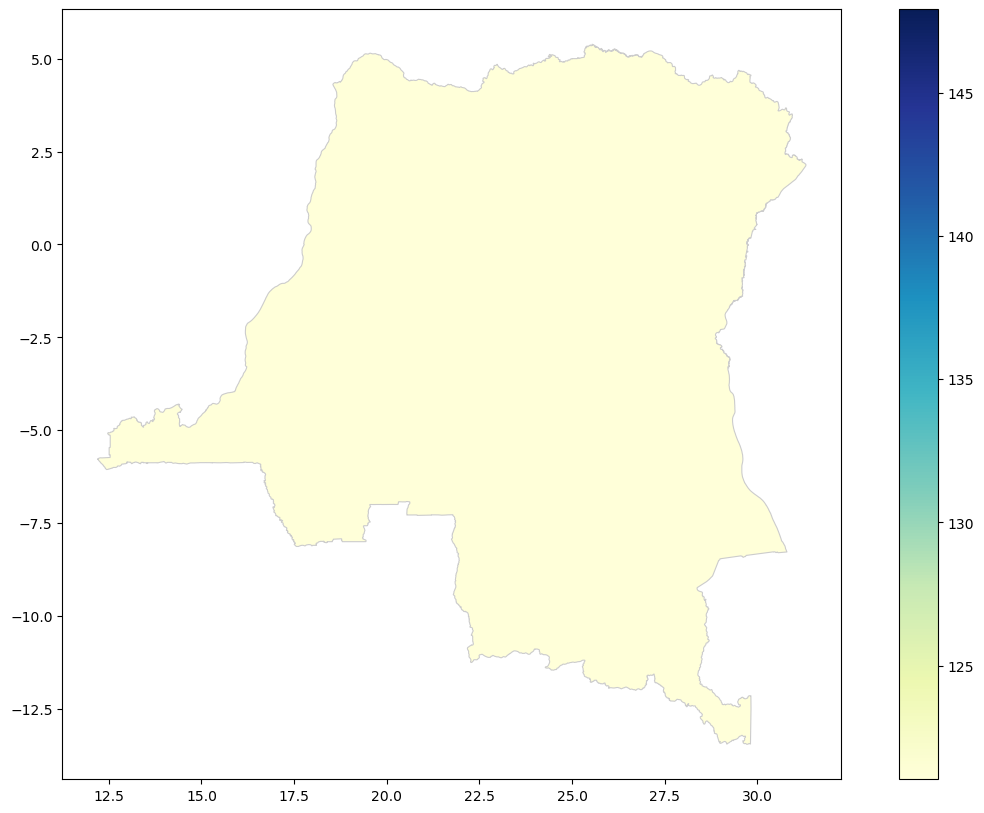

In [53]:
fig, ax = plt.subplots(figsize=(15, 10))
new_DRC_merged.plot(column='Observation Value', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

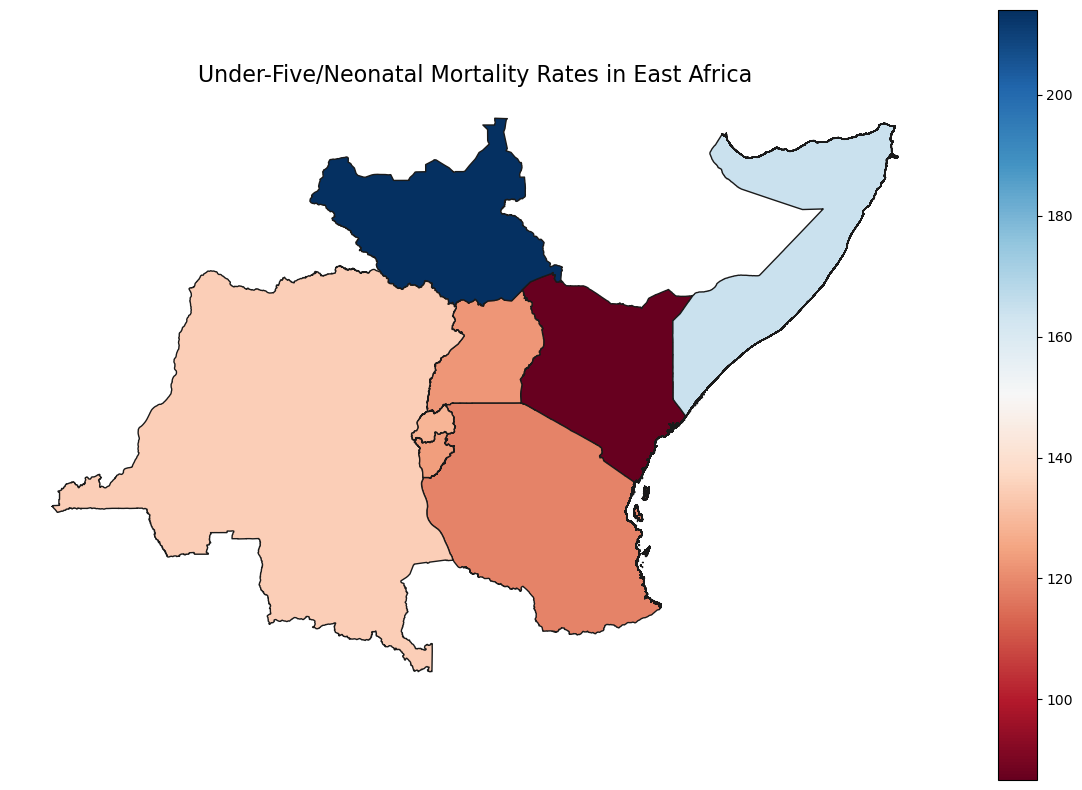

In [54]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Combine all the merged datasets into one GeoDataFrame
combined_gdf = gpd.GeoDataFrame(
    pd.concat([new_K_merged, new_U_merged, new_T_merged, new_S_merged, new_SS_merged,new_DRC_merged,new_B_merged,new_R_merged]),
    crs=new_K_merged.crs  # Keep the same coordinate reference system
)


fig, ax = plt.subplots(figsize=(15, 10))

combined_gdf.plot(
    column='Observation Value',   
    cmap='RdBu',                
    linewidth= 1, 
    edgecolor='0.1', 
    ax=ax, 
    legend=True                  
)

# 3. Beautify the map
ax.set_title('Under-Five/Neonatal Mortality Rates in East Africa', fontsize=16)
ax.axis('off')


plt.show()


# Plot 3
Show the average trends in the mortality rates over time (plot the average trend line and add the points in the graphic for the country level estimates for each indicator. Expectation: two plots).

In [55]:
dataset_eac = dataset_raw[dataset_raw['Geographic area'].isin(Eatern_Africa_Countries)]

In [56]:
under_5_east_africa = dataset_eac[dataset_eac['Indicator'] == 'Under-five mortality rate']
neonatal_east_africa = dataset_eac[dataset_eac['Indicator'] == 'Neonatal mortality rate']


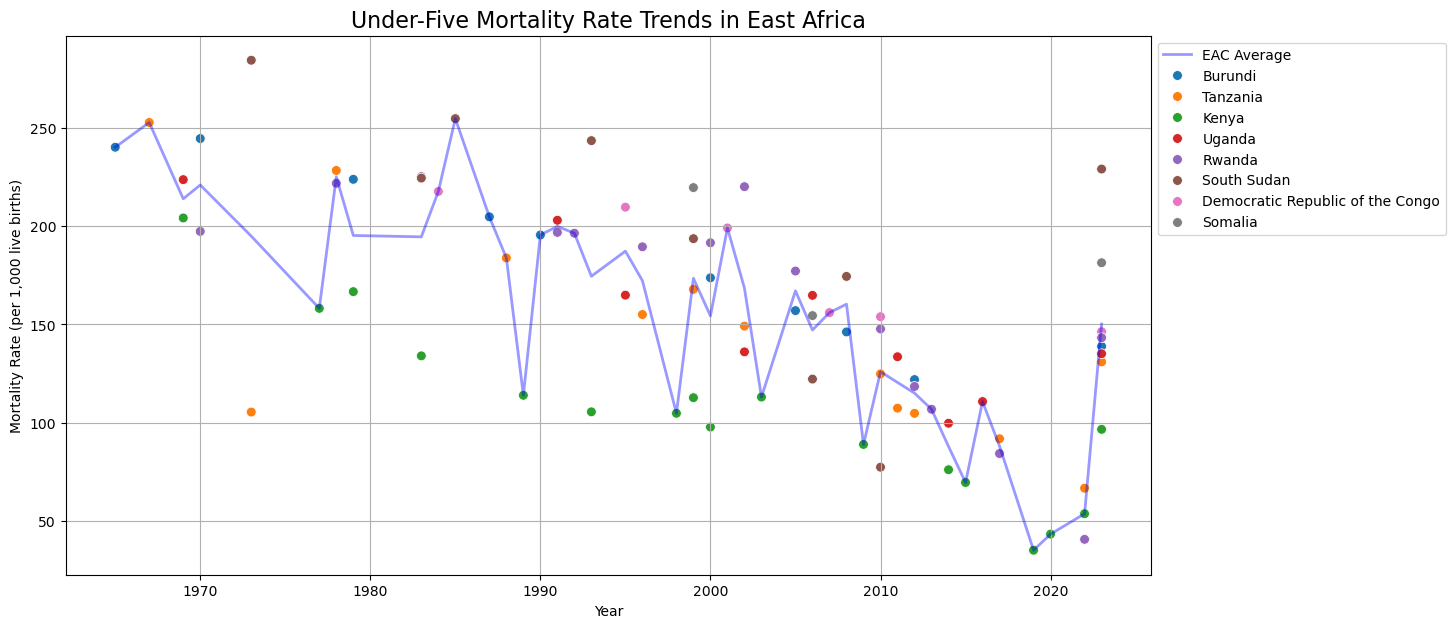

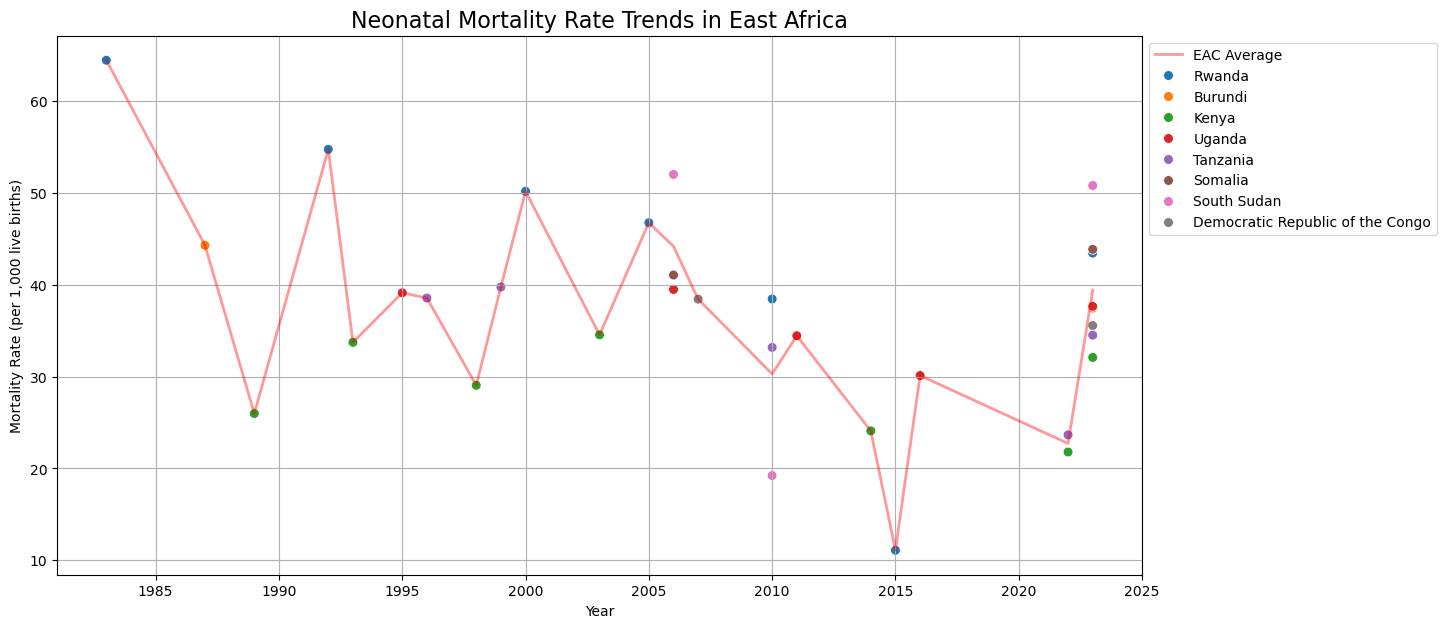

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Group data
# Make sure year column exists (sometimes called 'Time Period' or 'Year')
under_five_eac_grouped = under_5_east_africa.groupby(['Series Year', 'Geographic area'])['Observation Value'].mean().reset_index()
neonatal_eac_grouped = neonatal_east_africa.groupby(['Series Year', 'Geographic area'])['Observation Value'].mean().reset_index()

#  Calculate regional (EAC) average per year
under_five_eac_avg = under_five_eac_grouped.groupby('Series Year')['Observation Value'].mean().reset_index()
neonatal_eac_avg = neonatal_eac_grouped.groupby('Series Year')['Observation Value'].mean().reset_index()

#  Plot UNDER-FIVE MORTALITY
plt.figure(figsize=(14, 7))
sns.lineplot(data=under_five_eac_avg, x='Series Year', y='Observation Value', label='EAC Average', linewidth=2, color='blue', alpha= 0.4)
sns.scatterplot(data=under_five_eac_grouped, x='Series Year', y='Observation Value', hue='Geographic area', s=50, alpha=1)
plt.title('Under-Five Mortality Rate Trends in East Africa', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 1,000 live births)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

# Plot NEONATAL MORTALITY
plt.figure(figsize=(14, 7))
sns.lineplot(data=neonatal_eac_avg, x='Series Year', y='Observation Value', label='EAC Average', linewidth=2, color='red', alpha =0.4)
sns.scatterplot(data=neonatal_eac_grouped, x='Series Year', y='Observation Value', hue='Geographic area', s=50, alpha=1)
plt.title('Neonatal Mortality Rate Trends in East Africa', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 1,000 live births)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()


# Quiz
Based on your visualizations, identify the countries with the highest under-five mortality rates in East Africa and the highest neonatal mortality.

As of 2023, countries with the highest under-5 mortality rates:
1. South Sudan
2. Somalia
3. Democratic Republic of the Congo
4. Rwanda
5. Burundi
6. Uganda
7. Tanzania
8. Kenya

As of 2023, the countries with the highest neonatal mortality rates are:
1. South Sudan
2. Somalia
3. Rwanda
4. Uganda
5. Burundi
6. Democratic Republic of the Congo
7. Tanzania
8. Kenya

# Final Remarks

This analysis has been done using Python in Jupyter Notebooks and then converted to an RMD document as requested. I would appreciate feedback on any key areas I might have missed out on during the analysis or a thumbs-up if done correctly. I'm looking forward to hearing from you.

Regards,
Benson Wathigo Ngotho